# 1. Info del dataset

In [1]:
#cargamos las librerias que creemos que  vamos a necesitar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
path_file = "../Thesis/ar_properties.csv"

In [3]:
df = pd.read_csv(path_file, index_col=0,usecols= ['id','lat','lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6','rooms', 'bedrooms','bathrooms', 'surface_total', 'price', 'currency', 'property_type', 'operation_type'])

In [4]:
print(f"El dataframe es un csv con información de los departamentos puclicados en la plataforma (Properati).  En el dataset hay {df.shape[0]} filas y {df.shape[1]} columnas")

El dataframe es un csv con información de los departamentos puclicados en la plataforma (Properati).  En el dataset hay 1000000 filas y 16 columnas


In [5]:
df.head()

,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,price,currency,property_type,operation_type
id,,,,,,,,,,,,,,,,
DyVXfkpKygVBKuUk5olH+A==,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,NaN,NaN,NaN,133139.0,NaN,NaN,Lote,Venta
9naojilaMecJN4jlQiTkGg==,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,NaN,8.0,NaN,NaN,687.0,NaN,NaN,Otro,Venta
tlCPRJPjoDEUzuuCelemAQ==,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,NaN,NaN,2.0,1.0,1.0,80.0,NaN,NaN,Casa,Alquiler
Zw3b91glQUO3HNrM5fPYlQ==,-27.494106,-55.123455,Argentina,Misiones,Oberá,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,Lote,Venta
bsU81gm9JEgtZCbTYgvykg==,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,NaN,NaN,NaN,3.0,1.0,1.0,76.0,NaN,NaN,Departamento,Venta


## Estadisticas  del dataset.

In [6]:
df.describe().round()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,price
count,894233.0,894191.0,0.0,714179.0,649933.0,765122.0,477831.0,9.582430e+05
mean,-34.0,-59.0,NaN,3.0,2.0,2.0,514.0,3.460940e+05
std,3.0,3.0,NaN,2.0,2.0,1.0,4297.0,5.713690e+06
min,-55.0,-123.0,NaN,1.0,-16.0,1.0,-136.0,0.000000e+00
25%,-35.0,-59.0,NaN,2.0,1.0,1.0,50.0,3.800000e+04
50%,-35.0,-58.0,NaN,3.0,2.0,1.0,95.0,9.700000e+04
75%,-34.0,-58.0,NaN,4.0,3.0,2.0,250.0,2.100000e+05
max,50.0,180.0,NaN,40.0,900.0,20.0,200000.0,3.100000e+09


## Cambiamos nombres de la columna

In [7]:
df.columns

Index(['lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'price', 'currency', 'property_type',
       'operation_type'],
      dtype='object')

In [8]:
df.columns = ["latitud","longitud","pais","ciudad","barrio","l4","barrio_privado","l6","ambientes","habitaciones","baños","superficie_total","precio","divisa","tipo_de_propiedad","operacion"]

## Análisis más puntual de algunas variables y feature engineering

A través del método unique se analizará puntualmente algunas de las variables para ver si los datos contenidos por cada una se ajustan con lo esperado, y después poder avanzar hacia el tratamiento de los valores faltantes/nulos

In [9]:
df.pais.unique()

array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [10]:
df.ciudad.unique()

array(['Bs.As. G.B.A. Zona Norte', 'Buenos Aires Costa Atlántica',
       'Entre Ríos', 'Misiones', 'Santa Fe', 'Bs.As. G.B.A. Zona Oeste',
       'Tucumán', 'Chubut', 'Capital Federal', 'Córdoba',
       'Buenos Aires Interior', 'Bs.As. G.B.A. Zona Sur', 'Canelones',
       'San Luis', 'Neuquén', 'Colonia', 'Maldonado', 'Río Negro',
       'Montevideo', 'Mendoza', 'Corrientes', 'Salta', 'La Pampa',
       'Florida', 'Tierra Del Fuego', 'Chaco', 'Santa Cruz', 'Catamarca',
       'San Juan', 'Santiago Del Estero', 'Miami', 'Jujuy', 'Michigan',
       'São Paulo', 'La Rioja', 'Rocha', 'Santa Catarina', 'Pennsylvania',
       'Formosa', 'Rio Grande do Norte', 'Maryland', 'Rio de Janeiro',
       'California'], dtype=object)

In [11]:
df.barrio.unique()

array(['Pilar', 'Mar del Plata', 'Concordia', ..., 'La Criolla', 'Fraga',
       'Las Violetas'], dtype=object)

In [12]:
df.l4.unique()

array([nan, 'Caseros', 'Barrio San Eduardo - Pilar del Este', ...,
       'Inés Indart', 'Ing Ardigó',
       'Barrio Cerrado "San José de los Talas"'], dtype=object)

In [13]:
df.barrio_privado.unique()

array([nan, 'Barrio Barrancas del Lago', 'Barrio El Golf',
       'Barrio Los Alisos', 'BarrioPortezuelo', 'Barrio Los Lagos',
       'Barrio Lagos del Golf 2', 'Barrio Residencial Pacheco 2',
       'Barrio La Isla', 'Barrio Cabos del Lago', 'Enyoi',
       'Islas del Canal', 'Barrio El Yacht', 'Barrio Los Sauces',
       'Barrio Los Tilos', 'Barrio Los Castores', 'Barrio Las Glorietas',
       'QBay Yacht', 'Barrio La Alameda', 'Barrio Lagos del Golf 1',
       'Barrio Las Caletas', 'Barrio Residencial Pacheco 1'], dtype=object)

In [14]:
df.l6.unique()

array([nan])

Antes de pasar a la proxima instancia ,por el hecho de que nuestro dataset base es demasiado grande y tiene mucha informacion no relevante para nuestro objetivo futuro,tomamos la decision de filtrarlo y quedarnos con un dataset con la informacion de los tipos de propiedades que sea igual a departamento o casa y que esten ubicados en Capital Federal, de esta manera podremos analizar,evaluar y tomar conclusiones con mayor certeza y de una importante profundidad.

In [15]:
df = df[(df.ciudad == "Capital Federal") ] 

df.head()

,latitud,longitud,pais,ciudad,barrio,l4,barrio_privado,l6,ambientes,habitaciones,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
id,,,,,,,,,,,,,,,,
LrDZTDP9vyylLQ3SmazY1A==,-34.633053,-58.419906,Argentina,Capital Federal,Boedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,ARS,Oficina,Alquiler
hbIvfOetTyeiCcFPM4FATA==,-34.598112,-58.400784,Argentina,Capital Federal,Recoleta,NaN,NaN,NaN,NaN,NaN,3.0,265.0,65000.0,ARS,Oficina,Alquiler
srXXAu7Fb8/Kng0/cxUe7g==,-34.604054,-58.393770,Argentina,Capital Federal,Balvanera,NaN,NaN,NaN,NaN,NaN,1.0,80.0,60000.0,ARS,Oficina,Alquiler
M/gJEWU1uDbLN/bJfEdVCg==,-34.604054,-58.393770,Argentina,Capital Federal,Balvanera,NaN,NaN,NaN,NaN,NaN,1.0,50.0,38888.0,ARS,Oficina,Alquiler
dxnWsE9Rrk/ehENKrTbE/Q==,-34.599676,-58.371434,Argentina,Capital Federal,San Nicolás,NaN,NaN,NaN,NaN,NaN,1.0,80.0,20000.0,ARS,Oficina,Alquiler


In [16]:
df = df[(df.tipo_de_propiedad == "Casa") | (df.tipo_de_propiedad == "Departamento") |(df.tipo_de_propiedad == "PH") ]
df

,latitud,longitud,pais,ciudad,barrio,l4,barrio_privado,l6,ambientes,habitaciones,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
id,,,,,,,,,,,,,,,,
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,1.0,NaN,1.0,42.0,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,1.0,NaN,1.0,31.0,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,26.0,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,37.0,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,Argentina,Capital Federal,San Cristobal,NaN,NaN,NaN,1.0,NaN,1.0,40.0,15000.0,ARS,Departamento,Alquiler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29FiS2shjt7d2d87Xz2APA==,-34.570592,-58.462513,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,9.0,5.0,6.0,641.0,1650000.0,USD,Casa,Venta
jaNlZUF/XN/I8PWilhABqw==,-34.573074,-58.419353,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,8.0,5.0,3.0,419.0,1350000.0,USD,Departamento,Venta
No3is+HhwUGlfgQfzsZbdg==,-34.563411,-58.445656,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,6.0,5.0,4.0,285.0,1400000.0,USD,Departamento,Venta


Previo al analisis de los datos nulos,decidimos eliminar las columnas que no nos brindan informacion relevante para nuestro futuro modelo.

Eliminamos las columnas pais y ciudad ya que el hecho de que nos quedamos con el dataset filtrado en capital federal,significa que el unico valor de pais va a ser Argentina, y el de ciudad Capital federal, entonces nos es innecesario tener esas columnas

In [17]:
df = df.drop(columns=["pais"])

In [18]:
df = df.drop(columns=["ciudad"])

# 2.Duplicados

In [19]:
print("La cantidad de datos duplicados a lo largo de todo el dataset es de:")

df.duplicated().sum()

La cantidad de datos duplicados a lo largo de todo el dataset es de:


46647

El hecho de que nuestro dataset sea de inmuebles, y no existe en el mundo dos inmuebles identicos,decidimos eliminar los que son duplicados.

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.duplicated().sum()

0

# 3.Valores faltantes

In [22]:
# Observamos los datos nulos por columna,en valores netos y en porcentaje.
def missing_values(df_capital_vivienda):
    df_missing_count = df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'missing_count'})
    missing_percnt = df.isnull().sum() * 100 / df.shape[0] #df.shape[0] will give us the number of lines
    df_missing_percnt = pd.DataFrame(missing_percnt).round(2).reset_index().rename(columns={
                        'index':'column_name', 0:'missing_values(%)'})
   
    df1 = df_missing_count.merge(df_missing_percnt, how = 'inner', left_on = 'column_name', right_on = 'column_name')
    df1 = df1.sort_values(by = 'missing_values(%)',ascending = False)
    return df1

print("El porcentaje de datos faltantes por columna es de:")
missing_values(df)

El porcentaje de datos faltantes por columna es de:


,column_name,missing_count,missing_values(%)
4,barrio_privado,170551,100.00
5,l6,170551,100.00
3,l4,162124,95.06
9,superficie_total,47973,28.13
7,habitaciones,36146,21.19
6,ambientes,12443,7.30
0,latitud,10371,6.08
1,longitud,10371,6.08
8,baños,9557,5.60
11,divisa,2456,1.44


Decidimos eliminar las columnas "barrio privado" ya que no hay ningun barrio privado en la capital federal. Eliminamos tambien la columna l4 que contiene un 95% nulos, y el otro 5% no es relevante, ya que son los subbarrios de palermo.Tambien eliminamos la columna l6 ya que el 100% de la columna son datos nulos y no nos brinda ningun tipo de informacion. Por último y no de menos importancia eliminamos la columna de habitaciones,ya que tiene un gran porcentaje de datos nulos y el hecho de que tenemos la columna ambientes con muy pocos datos nulos nos provoca una muy poca necesidad de la columna de habitaciones ya que para el modelo y todo lo que vamos a trabajar en el futuro,nos es mas eficiente la columna de ambientes, que esta estrechamente relacionado con la de habitaciones.


In [23]:
#hacer la correlacion entre ambientes y habitacion
df['ambientes'].corr(df['habitaciones'])

0.8844679630033242

Observamos la gran correlacion que hay entre estas dos columnas, que es el motivo por la cual decidimos eliminar habitaciones.Es importante entender que eliminamos la columna habitaciones y no la de ambientes, ya que nos es mas efectivo para nuestra prediccion utilizar ambientes por el hecho de que los dormitorios estan incluidos en los ambientes,pero no todos los ambientes son dormitorios, por ejemplo el comedor o una oficina dentro del inmueble. Con esta decision vamos a tener en cuenta todos los tipos de ambientes.

In [24]:
df = df.drop(columns=["habitaciones"])

In [25]:
df = df.drop(columns=["barrio_privado"])


In [26]:
df = df.drop(columns=["l6"])

In [27]:
df = df.drop(columns=["l4"])

In [28]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),3)

superficie_total     0.281
ambientes            0.073
latitud              0.061
longitud             0.061
baños                0.056
divisa               0.014
precio               0.013
barrio               0.007
tipo_de_propiedad    0.000
operacion            0.000
dtype: float64

## Imputamos los datos nulos de cada columna.

####  Imputamos los nans de la columna "superficie_total", reemplazandolos por el promedio de superficie total de sus barrios respectivamente.

In [29]:
nulos = df[df.superficie_total.isna()]
no_nulos = df[df.superficie_total.notnull()]

In [30]:
df 

,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
id,,,,,,,,,,
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Almagro,1.0,1.0,42.0,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Palermo,1.0,1.0,31.0,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Belgrano,1.0,1.0,26.0,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Belgrano,1.0,1.0,37.0,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,San Cristobal,1.0,1.0,40.0,15000.0,ARS,Departamento,Alquiler
...,...,...,...,...,...,...,...,...,...,...
bBhDAJkRbJWukgHc0u//Zw==,-34.600052,-58.393015,Barrio Norte,5.0,1.0,110.0,318000.0,USD,Departamento,Venta
jaNlZUF/XN/I8PWilhABqw==,-34.573074,-58.419353,Palermo,8.0,3.0,419.0,1350000.0,USD,Departamento,Venta
No3is+HhwUGlfgQfzsZbdg==,-34.563411,-58.445656,Belgrano,6.0,4.0,285.0,1400000.0,USD,Departamento,Venta


In [31]:
del nulos["superficie_total"]

In [32]:
promedios = no_nulos.groupby("barrio", as_index=False).agg(superficie_total = ('superficie_total', 'mean'))
promedios

,barrio,superficie_total
0,Abasto,166.177966
1,Agronomía,80.775862
2,Almagro,67.274823
3,Balvanera,89.950290
4,Barracas,151.504012
5,Barrio Norte,107.237861
6,Belgrano,131.133721
7,Boca,88.932790
8,Boedo,127.849057
9,Caballito,91.981484


In [33]:
nulos = pd.merge(nulos, promedios, how ='inner', left_on="barrio", right_on="barrio")

In [34]:
df = no_nulos.append(nulos)
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_38200\952604274.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = no_nulos.append(nulos)


,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Almagro,1.0,1.0,42.000000,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Palermo,1.0,1.0,31.000000,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Belgrano,1.0,1.0,26.000000,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Belgrano,1.0,1.0,37.000000,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,San Cristobal,1.0,1.0,40.000000,15000.0,ARS,Departamento,Alquiler
...,...,...,...,...,...,...,...,...,...,...
47625,-34.687306,-58.470659,Villa Riachuelo,11.0,4.0,165.346154,280000.0,USD,PH,Venta
47626,-34.691433,-58.475236,Villa Riachuelo,1.0,2.0,165.346154,270000.0,USD,Casa,Venta
47627,-34.691161,-58.470573,Villa Riachuelo,1.0,4.0,165.346154,380000.0,USD,Casa,Venta
47628,-34.690471,-58.469827,Villa Riachuelo,3.0,1.0,165.346154,109000.0,USD,PH,Venta


In [35]:
df.superficie_total.isna().sum()

0

### Eliminamos las filas con datos nulos de barrio y precio ya que son insignificantes por su tamaño(0,007% y 0,013%).

In [36]:
df = df[~df.barrio.isnull()]
df.barrio.isna().sum()

0

In [37]:
df = df[~df.precio.isnull()]
df.precio .isna().sum()

0

### Imputamos la columna baños.


In [38]:
df.baños.value_counts(dropna=False) # Check unique values in column/hacemos un analisis de los valores que tenemos

1.0     107932
2.0      34636
3.0      10154
NaN       9228
4.0       3620
5.0       1164
6.0        263
7.0         67
8.0         40
9.0         21
10.0        18
12.0         5
15.0         2
18.0         2
17.0         1
11.0         1
Name: baños, dtype: int64

La columna de baños es una columna numerica entonces procedemos a imputar los datos nulos por la mediana.

In [39]:
from sklearn.impute import SimpleImputer

carwidth_imp = SimpleImputer(strategy="median")
carwidth_imp.fit(df[['baños']])
df['baños'] = carwidth_imp.transform(df[['baños']])

df.head()

,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Almagro,1.0,1.0,42.0,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Palermo,1.0,1.0,31.0,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Belgrano,1.0,1.0,26.0,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Belgrano,1.0,1.0,37.0,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,San Cristobal,1.0,1.0,40.0,15000.0,ARS,Departamento,Alquiler


### Imputamos la columna divisa

Habiendo hecho un analisis para la decision de por que valor imputar a los nulos,sabemos que es recomendado que a las variables categoricas se las reemplaze por la moda,y es por ello que a "divisa" la vamos a imputar por la moda.

In [40]:
from sklearn.impute import SimpleImputer

carwidth_imp = SimpleImputer(strategy="most_frequent")
carwidth_imp.fit(df[['divisa']])
df['divisa'] = carwidth_imp.transform(df[['divisa']])

df.head()

,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Almagro,1.0,1.0,42.0,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Palermo,1.0,1.0,31.0,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Belgrano,1.0,1.0,26.0,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Belgrano,1.0,1.0,37.0,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,San Cristobal,1.0,1.0,40.0,15000.0,ARS,Departamento,Alquiler


### Imputamos la columna ambientes.

In [41]:
df.ambientes.value_counts()

2.0     48281
3.0     40193
1.0     33537
4.0     22295
5.0      6890
6.0      2280
7.0      1025
8.0       375
9.0       158
10.0      144
12.0       38
11.0       37
14.0       16
15.0       13
20.0        8
16.0        8
21.0        6
18.0        6
30.0        3
13.0        3
22.0        3
17.0        2
35.0        2
19.0        2
26.0        1
24.0        1
28.0        1
Name: ambientes, dtype: int64

In [42]:
df.ambientes.median()

2.0

In [43]:
#decidimos reemplazar los datos nulos de ambientes,por la mediana de la columna.
from sklearn.impute import SimpleImputer

carwidth_imp = SimpleImputer(strategy="median")
carwidth_imp.fit(df[['ambientes']])
df['ambientes'] = carwidth_imp.transform(df[['ambientes']])

df.head()

,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion
3xIPcyYT3dxzTQSJ0mVh8A==,-34.616430,-58.414393,Almagro,1.0,1.0,42.0,20000.0,ARS,Departamento,Alquiler
zV3vsTl4h+23V06ipCgEwQ==,-34.579864,-58.415590,Palermo,1.0,1.0,31.0,16000.0,ARS,Departamento,Alquiler
gPBMJG7heEMEJqcUITZunw==,NaN,NaN,Belgrano,1.0,1.0,26.0,19000.0,ARS,Departamento,Alquiler
kzGB8OZT/FxKvdwQNIxOGw==,NaN,NaN,Belgrano,1.0,1.0,37.0,26000.0,ARS,Departamento,Alquiler
Xk5NrXofxWmaDDPcri/2Hg==,-34.623793,-58.402256,San Cristobal,1.0,1.0,40.0,15000.0,ARS,Departamento,Alquiler


Eliminamos los nans de la columna longitud y latitud, ya que ningun metodo de imputacion seria eficiente,por el hecho de que la lon t lat son unicas para los inmuebles.

In [44]:
df = df[~df.longitud.isnull()]
df.longitud.isna().sum()

0

In [45]:
df = df[~df.latitud.isnull()]
df.latitud.isna().sum()

0

In [46]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),3)

latitud              0.0
longitud             0.0
barrio               0.0
ambientes            0.0
baños                0.0
superficie_total     0.0
precio               0.0
divisa               0.0
tipo_de_propiedad    0.0
operacion            0.0
dtype: float64

df["superficie_descubierta"] = [df[["superficie_total"] - df["superficie_total"]]
df                                  

# 4.Observamos outlyers(graficos de boxplot, y aplicamos quantiles de ser necesario)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ambientes'>

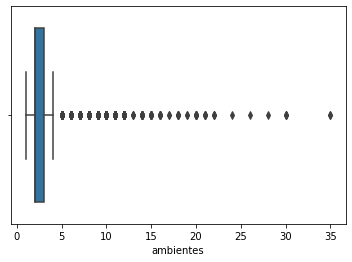

In [47]:
sns.boxplot(df['ambientes'])

In [48]:
df = df[(df.ambientes < df.ambientes.quantile(.99) ) & (df.ambientes > df.ambientes.quantile(.01)) ]
df.ambientes.describe()

count    124437.000000
mean          2.860050
std           0.981243
min           2.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: ambientes, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitud'>

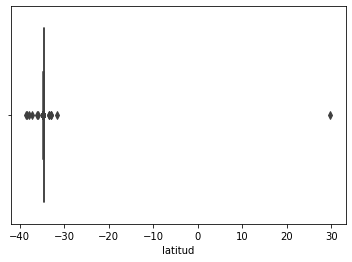

In [49]:
sns.boxplot(df['latitud'])

In [50]:
df = df[(df.latitud < df.latitud.quantile(.95) ) & (df.latitud > df.latitud.quantile(.05)) ]
df.latitud.describe()

count    111981.000000
mean        -34.596563
std           0.021621
min         -34.640732
25%         -34.613755
50%         -34.595894
75%         -34.579780
max         -34.554390
Name: latitud, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitud'>

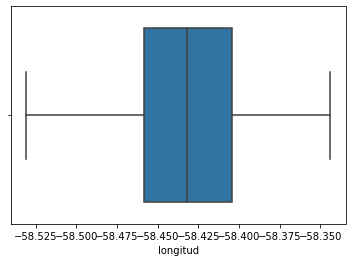

In [51]:
sns.boxplot(df['longitud'])

In [52]:
df = df[(df.longitud < df.longitud.quantile(.95) ) & (df.longitud > df.longitud.quantile(.05)) ]
df.longitud.describe()

count    100777.000000
mean        -58.431930
std           0.031757
min         -58.500618
25%         -58.454500
50%         -58.431719
75%         -58.406460
max         -58.372690
Name: longitud, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baños'>

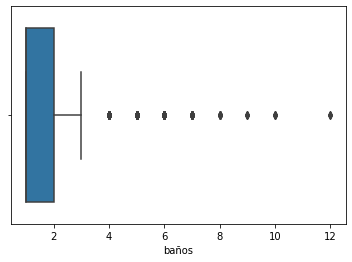

In [53]:
sns.boxplot(df['baños'])

In [54]:
df = df[(df.baños < df.baños.quantile(.98) ) & (df.baños > df.baños.quantile(.02)) ]
df.baños.describe()

count    32252.000000
mean         2.211522
std          0.408394
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: baños, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='superficie_total'>

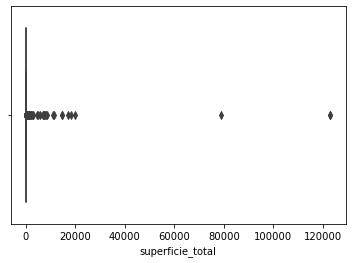

In [55]:
sns.boxplot(df['superficie_total'])

In [56]:
df = df[(df.superficie_total < df.superficie_total.quantile(.95) ) & (df.superficie_total > df.superficie_total.quantile(.05)) ]
df.superficie_total.describe()

count    28998.000000
mean       117.830747
std         39.393374
min         65.000000
25%         89.000000
50%        107.237861
75%        131.133721
max        251.000000
Name: superficie_total, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precio'>

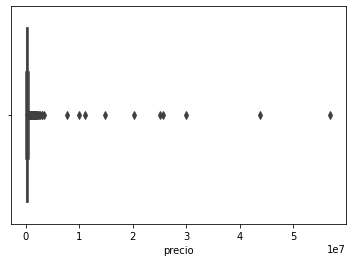

In [57]:
sns.boxplot(df['precio'])

In [58]:
df = df[(df.precio < df.precio.quantile(.95) ) & (df.precio > df.precio.quantile(.05)) ]
df.precio.describe()

count     26063.000000
mean     248072.578636
std      134816.515371
min        2950.000000
25%      158000.000000
50%      236000.000000
75%      330000.000000
max      629000.000000
Name: precio, dtype: float64

# Insights

Ya con el modelo filtrado de los outlyers y los datos nulos procedemos a hacer algunas hipotesis y sacar algunos insights.
Las hipotesis que queremos comprobar:
1. El barrio que mas publicaciones tiene es el barrio de Palermo.
2. El barrio con el m2 mas caro es el barrio de Puerto Madero.
3. Las casas son los inmuebles que mas baños tienen a diferencia de los deptos y los phs.
4. Los phs son los inmuebles mas baratos comprado a las casas y a los deptos.
5. Las propiedades con mayor superficie,son los phs.
6. Observamos que el barrio con mayor superficie total promedio de inmuebles es el barrio de Once.

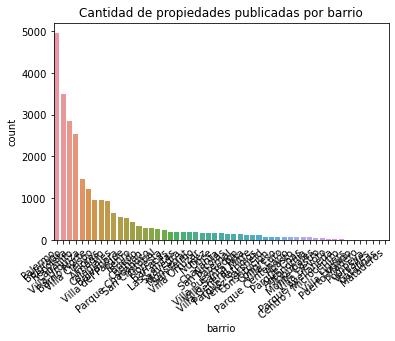

In [59]:
df['barrio'].value_counts()
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df, x = 'barrio',
              order = df['barrio'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Cantidad de propiedades publicadas por barrio')
plt.show()

In [60]:
df.barrio.value_counts()

Palermo                 4957
Belgrano                3491
Recoleta                2848
Caballito               2526
Villa Urquiza           1448
Barrio Norte            1211
Villa Crespo             957
Flores                   950
Almagro                  928
Colegiales               650
Balvanera                543
Villa del Parque         520
Retiro                   438
Boedo                    327
Coghlan                  286
Parque Chacabuco         285
San Cristobal            274
Floresta                 243
Barracas                 200
Las Cañitas              199
Saavedra                 197
Monserrat                189
San Telmo                183
Villa Ortuzar            178
Nuñez                    175
Once                     173
Chacarita                159
San Nicolás              148
Paternal                 146
Villa Pueyrredón         142
Villa Santa Rita         119
Villa General Mitre      116
Parque Patricios         115
Velez Sarsfield           81
Constitución  

Observamos que la hipotesis 1 es verdadera ya que el barrio con mayor publicaciones es el barrio de Palermo.

2. Para poder responder la hipotesis 2 creamos la variable de precio_m2.

In [61]:
df["precio_m2"] = df.precio / df.superficie_total
df

,latitud,longitud,barrio,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion,precio_m2
USxXzhvBZB0T57QlReZ65w==,-34.591775,-58.394100,Recoleta,3.0,2.0,68.000000,44000.0,ARS,Departamento,Alquiler,647.058824
255RT3/OVWWQB1ebLC0AQQ==,-34.590176,-58.389902,Recoleta,3.0,2.0,81.000000,60000.0,ARS,Departamento,Alquiler,740.740741
M9HDtzpBV9MLRqpoeuvWmA==,-34.591775,-58.394100,Barrio Norte,3.0,2.0,68.000000,44000.0,ARS,Departamento,Alquiler,647.058824
vTLZPklL1k2BEJlRogPrBw==,-34.604480,-58.492613,Floresta,4.0,2.0,90.000000,158000.0,USD,Casa,Venta,1755.555556
Qtitoi64jXa9Zfak4rUC9A==,-34.587221,-58.422979,Palermo,3.0,2.0,75.000000,349000.0,USD,Departamento,Venta,4653.333333
...,...,...,...,...,...,...,...,...,...,...,...
47569,-34.605247,-58.409415,Abasto,4.0,2.0,166.177966,180000.0,USD,Departamento,Venta,1083.176093
47585,-34.605247,-58.409415,Abasto,2.0,2.0,166.177966,98000.0,USD,Departamento,Venta,589.729206
47599,-34.602683,-58.412757,Abasto,3.0,2.0,166.177966,155600.0,USD,Departamento,Venta,936.345556
47602,-34.602543,-58.413457,Abasto,3.0,3.0,166.177966,285000.0,USD,Departamento,Venta,1715.028813


In [62]:
precio_m2_por_barrio = df.groupby('barrio')['precio_m2'].agg(['mean'])
precio_m2_por_barrio

,mean
barrio,
Abasto,1618.253463
Agronomía,2316.614819
Almagro,2293.022334
Balvanera,1666.192264
Barracas,2051.895912
Barrio Norte,2211.830293
Belgrano,2351.928431
Boedo,1573.133567
Caballito,2347.013344


<AxesSubplot:xlabel='barrio'>

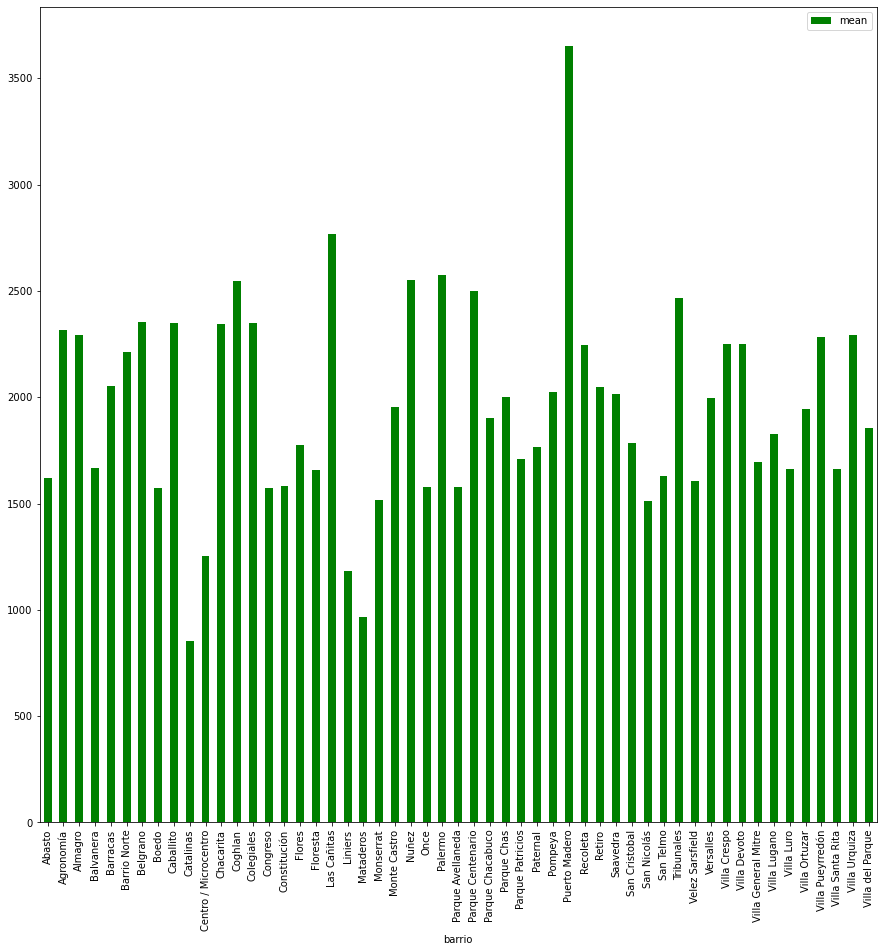

In [63]:
precio_m2_por_barrio.plot.bar(figsize=(15, 15),color= "green")

Con el grafico de arriba observamos y verificamos que la hipotesis 2 es verdadera,ya que el m2 del barrio de puerto madero es el mas caro.

<AxesSubplot:xlabel='tipo_de_propiedad', ylabel='baños'>

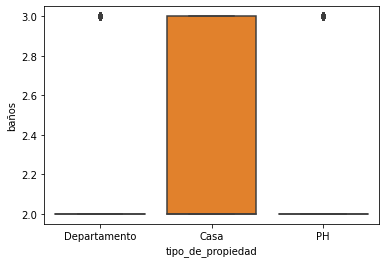

In [64]:
sns.boxplot(x='tipo_de_propiedad', y='baños', data=df)

In [65]:
df.groupby('tipo_de_propiedad')['baños'].agg(['mean'])

,mean
tipo_de_propiedad,
Casa,2.290298
Departamento,2.182679
PH,2.131048


Verificamos que la hipotesis 3 es verdadera ya que como observamos en los codigos recien corridos, por una poca diferencia en el promedio las casas o son las que mas baños tienen.

In [66]:
#4
df.groupby('tipo_de_propiedad')['precio_m2'].agg(['mean'])

,mean
tipo_de_propiedad,
Casa,2077.991334
Departamento,2291.648306
PH,1874.464732


<AxesSubplot:xlabel='tipo_de_propiedad', ylabel='precio_m2'>

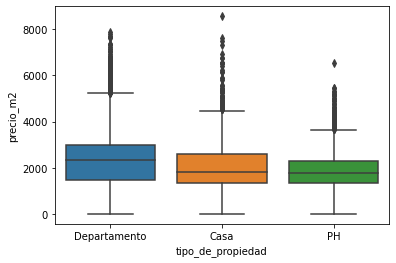

In [67]:
sns.boxplot(x='tipo_de_propiedad', y='precio_m2', data=df)

Observamos visualmente que la hipotesis 4 tambien es verdadera ya que los phs son los que menor tienen el precio por m2.

In [68]:
#5 
df.groupby('tipo_de_propiedad')['superficie_total'].agg(['mean'])


,mean
tipo_de_propiedad,
Casa,149.331033
Departamento,110.745070
PH,126.056417


<AxesSubplot:xlabel='tipo_de_propiedad', ylabel='superficie_total'>

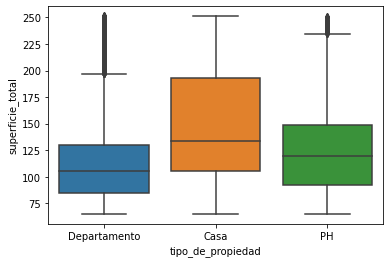

In [69]:
sns.boxplot(x='tipo_de_propiedad', y='superficie_total', data=df)

Observamos que la hipotesis 5 no es verdadadera ya que en promedio, las casas son las que mas superficies contienen, comparando a los deptos y a los Phs.

In [70]:
#6
superficie_por_barrio = df.groupby('barrio')['superficie_total'].agg(['mean'])
superficie_por_barrio

,mean
barrio,
Abasto,110.858082
Agronomía,103.895421
Almagro,91.537112
Balvanera,100.896427
Barracas,132.704406
Barrio Norte,114.575573
Belgrano,123.426266
Boedo,126.193815
Caballito,105.717920


<AxesSubplot:xlabel='barrio'>

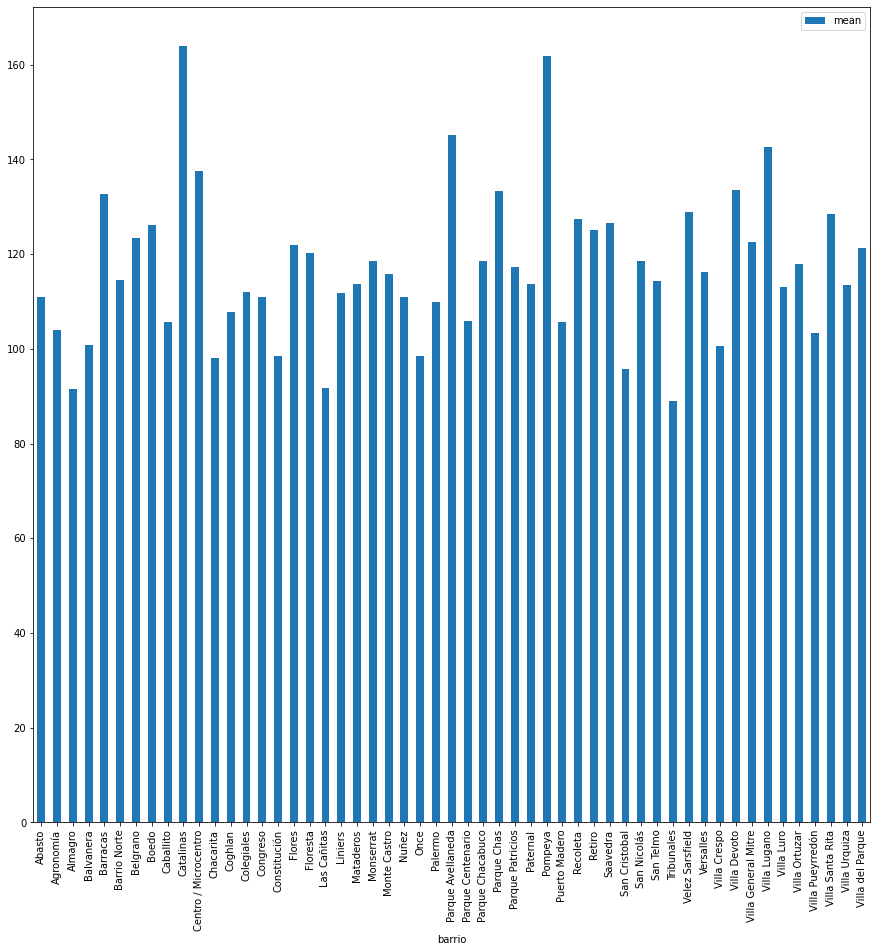

In [71]:
superficie_por_barrio.plot.bar(figsize=(15, 15))

Comprobamos que la hipotesis es falsa,ya que observamos que el barrio con mayor superficie total promedio de inmuebles es el barrio de Catalinas,seguido por el barrio de pompeya(y no el de Once).

Hago un heat map para ver las correlaciones entre las distintas variables del dataset

C:\Users\Usuario\AppData\Local\Temp\ipykernel_38200\2537339825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":14});


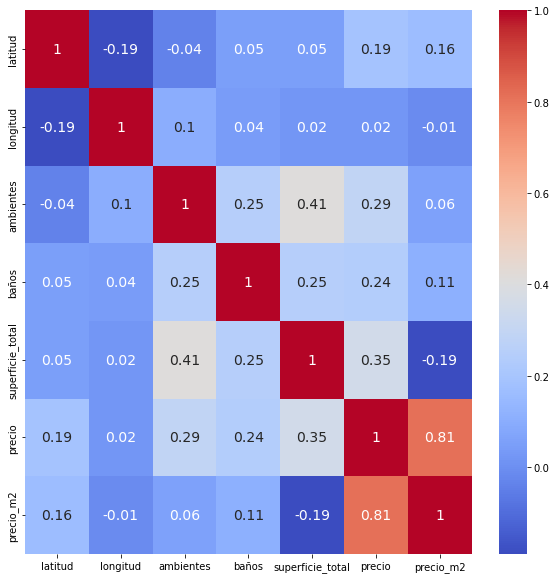

In [72]:
plt.figure(figsize = (10,10))
sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":14});

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# excluding all non-numeric columns and the target
X = df.select_dtypes(exclude='object').drop('precio', axis=1)

y = df.precio

cross_val_score(LinearRegression(), X, y, cv = 10).mean()

0.9233220191730123

Para armar nuestro modelo, primero tenemos que idetificar si lo conveniente es hacer una regresion o una clasificacion.

Como lo que buscamos es con el conjunto de datos poder estimar cual va a ser la temperatura en los próximos años, lo mas conveniente es usar un modelo de `Regresion Lineal` 

En primer lugar, con los registros que ya tenemos, podemos predecir el precio de nuevos departamentos. En ese caso seria una `regresion lineal multivariada`.

A partir de nuestro dataset llegamos a la conclusion de que el hecho de que nuestro objetivo sea predecir el precio(variable numerica) de los inmuebles,que es nuestro target. Para ello vamos a utilizar la regresion lineal, con variable dependiente la columna precio, y el resto de las columnas las variables independientes, es decir que el precio va a variar dependendiendo de las demas.


# Aplicamos el modelo de Regresion lineal de stats model

In [74]:
df.columns

Index(['latitud', 'longitud', 'barrio', 'ambientes', 'baños',
       'superficie_total', 'precio', 'divisa', 'tipo_de_propiedad',
       'operacion', 'precio_m2'],
      dtype='object')

In [75]:
columnas_seleccionadas = [
 'latitud', 'longitud', 'barrio', 'ambientes', 'baños',
       'superficie_total', 'precio', 'divisa', 'tipo_de_propiedad',
       'operacion']



import statsmodels.api as sm
#instanciar el modelo
modelo = sm.OLS.from_formula('precio ~ latitud + longitud + C(barrio) + ambientes + baños + superficie_total + C(divisa) + C(tipo_de_propiedad) + C(operacion)', data=df)
#entrenar el modelo
modelo_entrenado = modelo.fit()
#ver los resultados
modelo_entrenado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     780.2
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:16:54   Log-Likelihood:            -3.3113e+05
No. Observations:               26063   AIC:                         6.624e+05
Df Residuals:                   26000   BIC:                         6.629e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              1.06e+08   4.71e+06     22.515      0.000    9.68e+07    1.15e+08
C(barrio)[T.Agronomía]                1.127e+05   1.47e+04      7.652      0.000    8.38e+04    1.42e+05
C(barrio)[T.Almagro]                  6.005e+04   1.01e+04      5.928      0.000    4.02e+04    7.99e+04
C(barrio)[T.Balvanera]               -8526.6947   1.04e+04     -0.824      0.410   -2.88e+04    1.18e+04
C(barrio)[T.Barracas]                 6.245e+04   1.16e+04      5.371      0.000    3.97e+04    8.52e+04
C(barrio)[T.Barrio Norte]             5.711e+04   1.01e+04      5.664      0.000    3.73e+04    7.69e+04
C(barrio)[T.Belgrano]                 7.713e+04   1.05e+04      7.373      0.000    5.66e+04    9.76e+04
C(barrio)[T.Boedo]                    3.423e+04   1.09e+04      3.141      0.002    1.29e+04    5.56e+04
C(barrio)[T.Caballito]                1.198e+05   1.02e+04     11.801      0.000    9.99e+04     1.4e+05
C(barrio)[T.Catalinas]                -1.64e+05   8.04e+04     -2.039      0.042   -3.22e+05   -6316.180
C(barrio)[T.Centro / Microcentro]    -9.471e+04   2.13e+04     -4.453      0.000   -1.36e+05    -5.3e+04
C(barrio)[T.Chacarita]                6.955e+04   1.19e+04      5.859      0.000    4.63e+04    9.28e+04
C(barrio)[T.Coghlan]                  7.626e+04   1.17e+04      6.534      0.000    5.34e+04    9.91e+04
C(barrio)[T.Colegiales]               7.647e+04   1.06e+04      7.218      0.000    5.57e+04    9.72e+04
C(barrio)[T.Congreso]                -1.998e+04   1.32e+04     -1.513      0.130   -4.58e+04    5895.067
C(barrio)[T.Constitución]            -4231.6065   1.33e+04     -0.317      0.751   -3.04e+04    2.19e+04
C(barrio)[T.Flores]                   9.461e+04   1.08e+04      8.788      0.000    7.35e+04    1.16e+05
C(barrio)[T.Floresta]                 9.753e+04   1.21e+04      8.089      0.000    7.39e+04    1.21e+05
C(barrio)[T.Las Cañitas]              9.089e+04   1.16e+04      7.814      0.000    6.81e+04    1.14e+05
C(barrio)[T.Liniers]                 -1.354e+04   4.11e+04     -0.330      0.742   -9.41e+04     6.7e+04
C(barrio)[T.Mataderos]                -1.43e+05   8.05e+04     -1.777      0.076   -3.01e+05    1.47e+04
C(barrio)[T.Monserrat]               -1.986e+04   1.14e+04     -1.736      0.083   -4.23e+04    2564.775
C(barrio)[T.Monte Castro]             1.303e+05   1.67e+04      7.820      0.000    9.76e+04    1.63e+05
C(barrio)[T.Nuñez]                    8.306e+04   1.22e+04      6.791      0.000    5.91e+04    1.07e+05
C(barrio)[T.Once]                    -3816.1876   1.15e+04     -0.332      0.740   -2.63e+04    1.87e+04
C(barrio)[T.Palermo]                  1.059e+05   9984.163     10.611      0.000    8.64e+04    1.26e+05
C(barrio)[T.Parque Avellaneda]        

In [76]:
modelo = sm.OLS.from_formula('precio ~ latitud + longitud + C(barrio) + ambientes + baños + superficie_total + C(divisa) + C(tipo_de_propiedad) + C(operacion)', data=df)
#entrenar el modelo
modelo_entrenado = modelo.fit()
#ver los resultados
modelo_entrenado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     780.2
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:16:55   Log-Likelihood:            -3.3113e+05
No. Observations:               26063   AIC:                         6.624e+05
Df Residuals:                   26000   BIC:                         6.629e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              1.06e+08   4.71e+06     22.515      0.000    9.68e+07    1.15e+08
C(barrio)[T.Agronomía]                1.127e+05   1.47e+04      7.652      0.000    8.38e+04    1.42e+05
C(barrio)[T.Almagro]                  6.005e+04   1.01e+04      5.928      0.000    4.02e+04    7.99e+04
C(barrio)[T.Balvanera]               -8526.6947   1.04e+04     -0.824      0.410   -2.88e+04    1.18e+04
C(barrio)[T.Barracas]                 6.245e+04   1.16e+04      5.371      0.000    3.97e+04    8.52e+04
C(barrio)[T.Barrio Norte]             5.711e+04   1.01e+04      5.664      0.000    3.73e+04    7.69e+04
C(barrio)[T.Belgrano]                 7.713e+04   1.05e+04      7.373      0.000    5.66e+04    9.76e+04
C(barrio)[T.Boedo]                    3.423e+04   1.09e+04      3.141      0.002    1.29e+04    5.56e+04
C(barrio)[T.Caballito]                1.198e+05   1.02e+04     11.801      0.000    9.99e+04     1.4e+05
C(barrio)[T.Catalinas]                -1.64e+05   8.04e+04     -2.039      0.042   -3.22e+05   -6316.180
C(barrio)[T.Centro / Microcentro]    -9.471e+04   2.13e+04     -4.453      0.000   -1.36e+05    -5.3e+04
C(barrio)[T.Chacarita]                6.955e+04   1.19e+04      5.859      0.000    4.63e+04    9.28e+04
C(barrio)[T.Coghlan]                  7.626e+04   1.17e+04      6.534      0.000    5.34e+04    9.91e+04
C(barrio)[T.Colegiales]               7.647e+04   1.06e+04      7.218      0.000    5.57e+04    9.72e+04
C(barrio)[T.Congreso]                -1.998e+04   1.32e+04     -1.513      0.130   -4.58e+04    5895.067
C(barrio)[T.Constitución]            -4231.6065   1.33e+04     -0.317      0.751   -3.04e+04    2.19e+04
C(barrio)[T.Flores]                   9.461e+04   1.08e+04      8.788      0.000    7.35e+04    1.16e+05
C(barrio)[T.Floresta]                 9.753e+04   1.21e+04      8.089      0.000    7.39e+04    1.21e+05
C(barrio)[T.Las Cañitas]              9.089e+04   1.16e+04      7.814      0.000    6.81e+04    1.14e+05
C(barrio)[T.Liniers]                 -1.354e+04   4.11e+04     -0.330      0.742   -9.41e+04     6.7e+04
C(barrio)[T.Mataderos]                -1.43e+05   8.05e+04     -1.777      0.076   -3.01e+05    1.47e+04
C(barrio)[T.Monserrat]               -1.986e+04   1.14e+04     -1.736      0.083   -4.23e+04    2564.775
C(barrio)[T.Monte Castro]             1.303e+05   1.67e+04      7.820      0.000    9.76e+04    1.63e+05
C(barrio)[T.Nuñez]                    8.306e+04   1.22e+04      6.791      0.000    5.91e+04    1.07e+05
C(barrio)[T.Once]                    -3816.1876   1.15e+04     -0.332      0.740   -2.63e+04    1.87e+04
C(barrio)[T.Palermo]                  1.059e+05   9984.163     10.611      0.000    8.64e+04    1.26e+05
C(barrio)[T.Parque Avellaneda]        

Dado que el p-valor es mayor a 0.05 no existen hipotesis para afirmar que las variables cantidad_de_ruedas y cantdad_de_kilometros impacten la variable. Tanto Válvula cómo Pistón tienen razón, no hay pruebas para afirmarlo

In [77]:
modelo = sm.OLS.from_formula('precio ~ latitud + longitud + C(barrio) + ambientes + baños + superficie_total + C(divisa) + C(tipo_de_propiedad) + C(operacion)', data=df)
#entrenar el modelo
modelo_entrenado = modelo.fit()
#ver los resultados
modelo_entrenado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     780.2
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:16:55   Log-Likelihood:            -3.3113e+05
No. Observations:               26063   AIC:                         6.624e+05
Df Residuals:                   26000   BIC:                         6.629e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              1.06e+08   4.71e+06     22.515      0.000    9.68e+07    1.15e+08
C(barrio)[T.Agronomía]                1.127e+05   1.47e+04      7.652      0.000    8.38e+04    1.42e+05
C(barrio)[T.Almagro]                  6.005e+04   1.01e+04      5.928      0.000    4.02e+04    7.99e+04
C(barrio)[T.Balvanera]               -8526.6947   1.04e+04     -0.824      0.410   -2.88e+04    1.18e+04
C(barrio)[T.Barracas]                 6.245e+04   1.16e+04      5.371      0.000    3.97e+04    8.52e+04
C(barrio)[T.Barrio Norte]             5.711e+04   1.01e+04      5.664      0.000    3.73e+04    7.69e+04
C(barrio)[T.Belgrano]                 7.713e+04   1.05e+04      7.373      0.000    5.66e+04    9.76e+04
C(barrio)[T.Boedo]                    3.423e+04   1.09e+04      3.141      0.002    1.29e+04    5.56e+04
C(barrio)[T.Caballito]                1.198e+05   1.02e+04     11.801      0.000    9.99e+04     1.4e+05
C(barrio)[T.Catalinas]                -1.64e+05   8.04e+04     -2.039      0.042   -3.22e+05   -6316.180
C(barrio)[T.Centro / Microcentro]    -9.471e+04   2.13e+04     -4.453      0.000   -1.36e+05    -5.3e+04
C(barrio)[T.Chacarita]                6.955e+04   1.19e+04      5.859      0.000    4.63e+04    9.28e+04
C(barrio)[T.Coghlan]                  7.626e+04   1.17e+04      6.534      0.000    5.34e+04    9.91e+04
C(barrio)[T.Colegiales]               7.647e+04   1.06e+04      7.218      0.000    5.57e+04    9.72e+04
C(barrio)[T.Congreso]                -1.998e+04   1.32e+04     -1.513      0.130   -4.58e+04    5895.067
C(barrio)[T.Constitución]            -4231.6065   1.33e+04     -0.317      0.751   -3.04e+04    2.19e+04
C(barrio)[T.Flores]                   9.461e+04   1.08e+04      8.788      0.000    7.35e+04    1.16e+05
C(barrio)[T.Floresta]                 9.753e+04   1.21e+04      8.089      0.000    7.39e+04    1.21e+05
C(barrio)[T.Las Cañitas]              9.089e+04   1.16e+04      7.814      0.000    6.81e+04    1.14e+05
C(barrio)[T.Liniers]                 -1.354e+04   4.11e+04     -0.330      0.742   -9.41e+04     6.7e+04
C(barrio)[T.Mataderos]                -1.43e+05   8.05e+04     -1.777      0.076   -3.01e+05    1.47e+04
C(barrio)[T.Monserrat]               -1.986e+04   1.14e+04     -1.736      0.083   -4.23e+04    2564.775
C(barrio)[T.Monte Castro]             1.303e+05   1.67e+04      7.820      0.000    9.76e+04    1.63e+05
C(barrio)[T.Nuñez]                    8.306e+04   1.22e+04      6.791      0.000    5.91e+04    1.07e+05
C(barrio)[T.Once]                    -3816.1876   1.15e+04     -0.332      0.740   -2.63e+04    1.87e+04
C(barrio)[T.Palermo]                  1.059e+05   9984.163     10.611      0.000    8.64e+04    1.26e+05
C(barrio)[T.Parque Avellaneda]        

Evaluamos el modelo

In [78]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df['precio'], modelo_entrenado.predict(df[columnas_seleccionadas]))

0.4807554172169061

El mean_absolute_percentage_error (MAPE), también conocido como error porcentual medio absoluto, es una métrica de evaluación utilizada en modelos de regresión. Se calcula como la media del porcentaje absoluto de error entre las predicciones del modelo y los valores reales para cada uno de los ejemplos en el conjunto de datos. Matemáticamente, se define como:

MAPE = (1/n) * Σ |(y - y')| / y

donde n es el número de ejemplos en el conjunto de datos, y y y' son el valor real y la predicción del modelo para el ejemplo i-ésimo respectivamente. El MAPE se utiliza para evaluar la precisión del modelo y se expresa en términos porcentuales. Un modelo con un MAPE bajo se considera más preciso que un modelo con un MAPE alto.

## Interpretacion de los resultados. Cual es la intuición del modelo? Explicacion de la formula que representa al modelo.

La regresión lineal mostrada tiene como objetivo predecir el valor del precio de los inmuebles en base a distintas variables. La variable "Intercept" representa el valor del precio esperado en el caso de que todas las otras variables estén en su valor mínimo o nulo. La variable "C(barrio)[T.agronomia]" representa el efecto del tipo de barrio en el precio del inmueble, y "C(barrio)[T.almagro]" representa el efecto del tipo de barrio almagro en el precio del inmueble, y asi con todos los diferentes barrios y sus repectivas influencias para con la propiedad. Las variables "C(divisa)[T.USD]" y "C(divisa)[T.ARS]" representan el efecto de la divisa  en el valor de la propiedad. Finalmente, la variable "tipo_de_propiedad" representa el efecto del tipo de propiedad en el valor de la misma ya sea PH,depto o casa. Los valores asociados a cada una de estas variables indican el aumento o disminución esperado en el valor inmueble en base a cada una de ellas. Por ejemplo, se espera que un depto ubicado en el barrio recoleta  tenga un valor de 7.416e+04 .

# Aplicamos el modelo de Regresion lineal de Sklearn para comprobar que nuestro modelo de stats models nos da los valores correctos. 

Para poder aplicar el modelo de sklearn,es necesario realizar el escalado en las variables si es que lo necesitan y hacer encoding en las variables categoricas que lo requieren.

In [79]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['latitud', 'longitud', 'ambientes', 'baños', 'superficie_total',
       'precio', 'precio_m2'],
      dtype='object')

Observamos que ninguna de las variables necesita del escalado,es por ello que las dejamos como estan. "Latitud" y "longitud" no lo necesitan ya que son variables que definen una ubicacion. "Ambientes" y "baños" son variables categoricas, ya que no existen que hayan 2,5 baños por ejemplo, o 3,4 ambientes. "Superficie_total" no requiere de escalado pq es una variable que te define el tamaño del inmueble y por ultimo tenemos a la columna "precio" que va a ser nuestro target,por ende no la escalamos.

## Encoding de variables categoricas

In [80]:
#observamos las variables categoricas que tenemos en nuestro df.
categoricas = df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['barrio', 'divisa', 'tipo_de_propiedad', 'operacion'], dtype='object')

### Hacemos el encoding de la columna barrio.

In [81]:
print(f"Los valores unicos de barrio son {df.barrio.unique()}")

Los valores unicos de barrio son ['Recoleta' 'Barrio Norte' 'Floresta' 'Palermo' 'Belgrano' 'Once' 'Flores'
 'Coghlan' 'Caballito' 'Colegiales' 'Villa Urquiza' 'Parque Chacabuco'
 'Saavedra' 'Monserrat' 'Villa Crespo' 'Almagro' 'San Cristobal'
 'Villa Luro' 'Nuñez' 'Las Cañitas' 'Villa del Parque' 'Parque Centenario'
 'Constitución' 'Parque Patricios' 'Retiro' 'Villa Pueyrredón'
 'Centro / Microcentro' 'Abasto' 'Paternal' 'Congreso' 'Balvanera'
 'Chacarita' 'Villa General Mitre' 'San Nicolás' 'Boedo' 'Agronomía'
 'Villa Santa Rita' 'San Telmo' 'Velez Sarsfield' 'Tribunales'
 'Villa Ortuzar' 'Barracas' 'Parque Chas' 'Parque Avellaneda'
 'Villa Devoto' 'Monte Castro' 'Villa Lugano' 'Pompeya' 'Puerto Madero'
 'Catalinas' 'Liniers' 'Mataderos' 'Versalles']


In [82]:
#Es una variable multicategorica, le hacemos el one hot encoder.
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['barrio']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['barrio']])

df[ohe.get_feature_names_out()] = enginetype_encoded


df.drop(columns='barrio', inplace = True)

df

[array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
        'Barrio Norte', 'Belgrano', 'Boedo', 'Caballito', 'Catalinas',
        'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
        'Congreso', 'Constitución', 'Flores', 'Floresta', 'Las Cañitas',
        'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez',
        'Once', 'Palermo', 'Parque Avellaneda', 'Parque Centenario',
        'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal',
        'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
        'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
        'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
        'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
        'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Santa Rita',
        'Villa Urquiza', 'Villa del Parque'], dtype=object)]

array(['barrio_Abasto', 'barrio_Agronomía', 'barrio_Almagro',
       'barrio_Balvanera', 'barrio_Barracas', 'barrio_Barrio Norte',
       'barrio_Belgrano', 'barrio_Boedo', 'barrio_Caballito',
       'barrio_Catalinas', 'barrio_Centro / Microcentro',
       'barrio_Chacarita', 'barrio_Coghlan', 'barrio_Colegiales',
       'barrio_Congreso', 'barrio_Constitución', 'barrio_Flores',
       'barrio_Floresta', 'barrio_Las Cañitas', 'barrio_Liniers',
       'barrio_Mataderos', 'barrio_Monserrat', 'barrio_Monte Castro',
       'barrio_Nuñez', 'barrio_Once', 'barrio_Palermo',
       'barrio_Parque Avellaneda', 'barrio_Parque Centenario',
       'barrio_Parque Chacabuco', 'barrio_Parque Chas',
       'barrio_Parque Patricios', 'barrio_Paternal', 'barrio_Pompeya',
       'barrio_Puerto Madero', 'barrio_Recoleta', 'barrio_Retiro',
       'barrio_Saavedra', 'barrio_San Cristobal', 'barrio_San Nicolás',
       'barrio_San Telmo', 'barrio_Tribunales', 'barrio_Velez Sarsfield',
       'barrio_Versall

,latitud,longitud,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion,precio_m2,...,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Santa Rita,barrio_Villa Urquiza,barrio_Villa del Parque
USxXzhvBZB0T57QlReZ65w==,-34.591775,-58.394100,3.0,2.0,68.000000,44000.0,ARS,Departamento,Alquiler,647.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255RT3/OVWWQB1ebLC0AQQ==,-34.590176,-58.389902,3.0,2.0,81.000000,60000.0,ARS,Departamento,Alquiler,740.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M9HDtzpBV9MLRqpoeuvWmA==,-34.591775,-58.394100,3.0,2.0,68.000000,44000.0,ARS,Departamento,Alquiler,647.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vTLZPklL1k2BEJlRogPrBw==,-34.604480,-58.492613,4.0,2.0,90.000000,158000.0,USD,Casa,Venta,1755.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qtitoi64jXa9Zfak4rUC9A==,-34.587221,-58.422979,3.0,2.0,75.000000,349000.0,USD,Departamento,Venta,4653.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47569,-34.605247,-58.409415,4.0,2.0,166.177966,180000.0,USD,Departamento,Venta,1083.176093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47585,-34.605247,-58.409415,2.0,2.0,166.177966,98000.0,USD,Departamento,Venta,589.729206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47599,-34.602683,-58.412757,3.0,2.0,166.177966,155600.0,USD,Departamento,Venta,936.345556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47602,-34.602543,-58.413457,3.0,3.0,166.177966,285000.0,USD,Departamento,Venta,1715.028813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hacemos el encoding de la columna divisa.

In [83]:
print(f"Los valores unicos de barrio son {df.divisa.unique()}")

Los valores unicos de barrio son ['ARS' 'USD']


In [84]:
# es una variable binaria pq tiene solo dos valores posibles la columna.
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['divisa'] = binary_encoder.fit_transform(df[['divisa']])

df.head()

,latitud,longitud,ambientes,baños,superficie_total,precio,divisa,tipo_de_propiedad,operacion,precio_m2,...,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Santa Rita,barrio_Villa Urquiza,barrio_Villa del Parque
USxXzhvBZB0T57QlReZ65w==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,Departamento,Alquiler,647.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255RT3/OVWWQB1ebLC0AQQ==,-34.590176,-58.389902,3.0,2.0,81.0,60000.0,0.0,Departamento,Alquiler,740.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M9HDtzpBV9MLRqpoeuvWmA==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,Departamento,Alquiler,647.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vTLZPklL1k2BEJlRogPrBw==,-34.604480,-58.492613,4.0,2.0,90.0,158000.0,1.0,Casa,Venta,1755.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qtitoi64jXa9Zfak4rUC9A==,-34.587221,-58.422979,3.0,2.0,75.0,349000.0,1.0,Departamento,Venta,4653.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hacemos el encoding de la columna tipo de propiedad

In [85]:
print(f"Los valores unicos de tipo de propiedad son {df.tipo_de_propiedad.unique()}")

Los valores unicos de tipo de propiedad son ['Departamento' 'Casa' 'PH']


In [86]:
#Es una variable multicategorica, le hacemos el one hot encoder.
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['tipo_de_propiedad']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['tipo_de_propiedad']])

df[ohe.get_feature_names_out()] = enginetype_encoded


df.drop(columns='tipo_de_propiedad', inplace = True)

df.head()

[array(['Casa', 'Departamento', 'PH'], dtype=object)]

array(['tipo_de_propiedad_Casa', 'tipo_de_propiedad_Departamento',
       'tipo_de_propiedad_PH'], dtype=object)

,latitud,longitud,ambientes,baños,superficie_total,precio,divisa,operacion,precio_m2,barrio_Abasto,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Santa Rita,barrio_Villa Urquiza,barrio_Villa del Parque,tipo_de_propiedad_Casa,tipo_de_propiedad_Departamento,tipo_de_propiedad_PH
USxXzhvBZB0T57QlReZ65w==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,Alquiler,647.058824,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255RT3/OVWWQB1ebLC0AQQ==,-34.590176,-58.389902,3.0,2.0,81.0,60000.0,0.0,Alquiler,740.740741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
M9HDtzpBV9MLRqpoeuvWmA==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,Alquiler,647.058824,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
vTLZPklL1k2BEJlRogPrBw==,-34.604480,-58.492613,4.0,2.0,90.0,158000.0,1.0,Venta,1755.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Qtitoi64jXa9Zfak4rUC9A==,-34.587221,-58.422979,3.0,2.0,75.0,349000.0,1.0,Venta,4653.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Hacemos el encoding de la columna tipo de operacion.


In [87]:
print(f"Los valores unicos de operacion son {df.operacion.unique()}")

Los valores unicos de operacion son ['Alquiler' 'Venta' 'Alquiler temporal']


In [88]:
#Es una variable multicategorica, le hacemos el one hot encoder.
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['operacion']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['operacion']])

df[ohe.get_feature_names_out()] = enginetype_encoded


df.drop(columns='operacion', inplace = True)

df.head()

[array(['Alquiler', 'Alquiler temporal', 'Venta'], dtype=object)]

array(['operacion_Alquiler', 'operacion_Alquiler temporal',
       'operacion_Venta'], dtype=object)

,latitud,longitud,ambientes,baños,superficie_total,precio,divisa,precio_m2,barrio_Abasto,barrio_Agronomía,...,barrio_Villa Pueyrredón,barrio_Villa Santa Rita,barrio_Villa Urquiza,barrio_Villa del Parque,tipo_de_propiedad_Casa,tipo_de_propiedad_Departamento,tipo_de_propiedad_PH,operacion_Alquiler,operacion_Alquiler temporal,operacion_Venta
USxXzhvBZB0T57QlReZ65w==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,647.058824,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
255RT3/OVWWQB1ebLC0AQQ==,-34.590176,-58.389902,3.0,2.0,81.0,60000.0,0.0,740.740741,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
M9HDtzpBV9MLRqpoeuvWmA==,-34.591775,-58.394100,3.0,2.0,68.0,44000.0,0.0,647.058824,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
vTLZPklL1k2BEJlRogPrBw==,-34.604480,-58.492613,4.0,2.0,90.0,158000.0,1.0,1755.555556,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Qtitoi64jXa9Zfak4rUC9A==,-34.587221,-58.422979,3.0,2.0,75.0,349000.0,1.0,4653.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Modelado de Sklearn

Como ya aplicamos en el modelo de statmodels, nuestra variable dependiente va a ser la columna "precio" (que es nuestro target) y todo el resto del df van a ser las variables independientes.

In [89]:
# Define X and y
y = df['precio']
X = df.drop(columns=['precio'])

In [90]:
#Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.30, random_state= 10)

In [91]:
from sklearn.linear_model import LinearRegression # explicit class import from module
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.9366901360112956


In [93]:
model.coef_

array([ 3.22348714e+05,  1.81811578e+05,  3.84006861e+03,  8.16750609e+03,
        1.87695051e+03, -1.06278216e+05,  9.97771179e+01, -1.07472867e+04,
        3.09659792e+03, -7.43889529e+03, -2.85749888e+03, -3.58868700e+03,
        1.66371774e+03,  2.65724124e+03, -3.39770095e+03,  1.02907671e+04,
       -7.58439458e+04, -2.22326288e+04, -8.82375977e+03, -1.85195676e+03,
        5.63806742e+03, -7.84897563e+03, -8.09390358e+03,  1.08280071e+04,
        1.27798500e+04, -1.31941532e+04,  2.10158887e+04, -5.09025631e+03,
       -1.12232875e+04,  1.41374868e+04,  4.13208808e+03, -7.16836515e+03,
       -8.09495253e+02,  6.38730253e+03, -1.03221108e+04,  4.91779100e+03,
        2.64016706e+02,  3.28245334e+03,  2.83361464e+03,  1.41881173e-10,
        2.67762616e+04,  1.86933395e+03, -1.50509616e+02, -8.12371834e+02,
       -4.24674202e+03, -1.41432590e+04, -5.79982696e+03, -1.64836327e+04,
        1.89793524e+04,  3.63797881e-12, -6.81201882e+02,  1.80451522e+04,
        6.32261898e+03,  

A diferencia del modelo de Statmodel, el Sklearn me dio un r2 mucho mas alto, esto significa que el modelo es mucho mas acertado. El margen entre los r2 de los dos modelos es de un 30 porciento que es un monton, esto quiere decir que de 10 departamentos que hagamos la prediccion del precio, con el modelo de statmodels acertariamos a 6 aproximadamente,en cambio con el modelo de sklearn acertariamos a 9 aprox. 

In [94]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

#MSE
print(mean_squared_error(y_test,y_pred))

#RMSE
print(math.sqrt(mean_squared_error(y_test,y_pred)))

#MAE
print(mean_absolute_error(y_test,y_pred))

#MAPE
print(mean_absolute_percentage_error(y_test,y_pred))

#R2
print(r2_score(y_test,y_pred))

1165300646.9875824
34136.50021586253
23689.872771099203
0.37522414137167814
0.9366901360112956


El MAPE tambien nos dio menor que en el modelo de statmodels(0.375) esto es algo positivo ya que menor es el MAPE, mas preciso es nuestro modelo y nuestra prediccion.

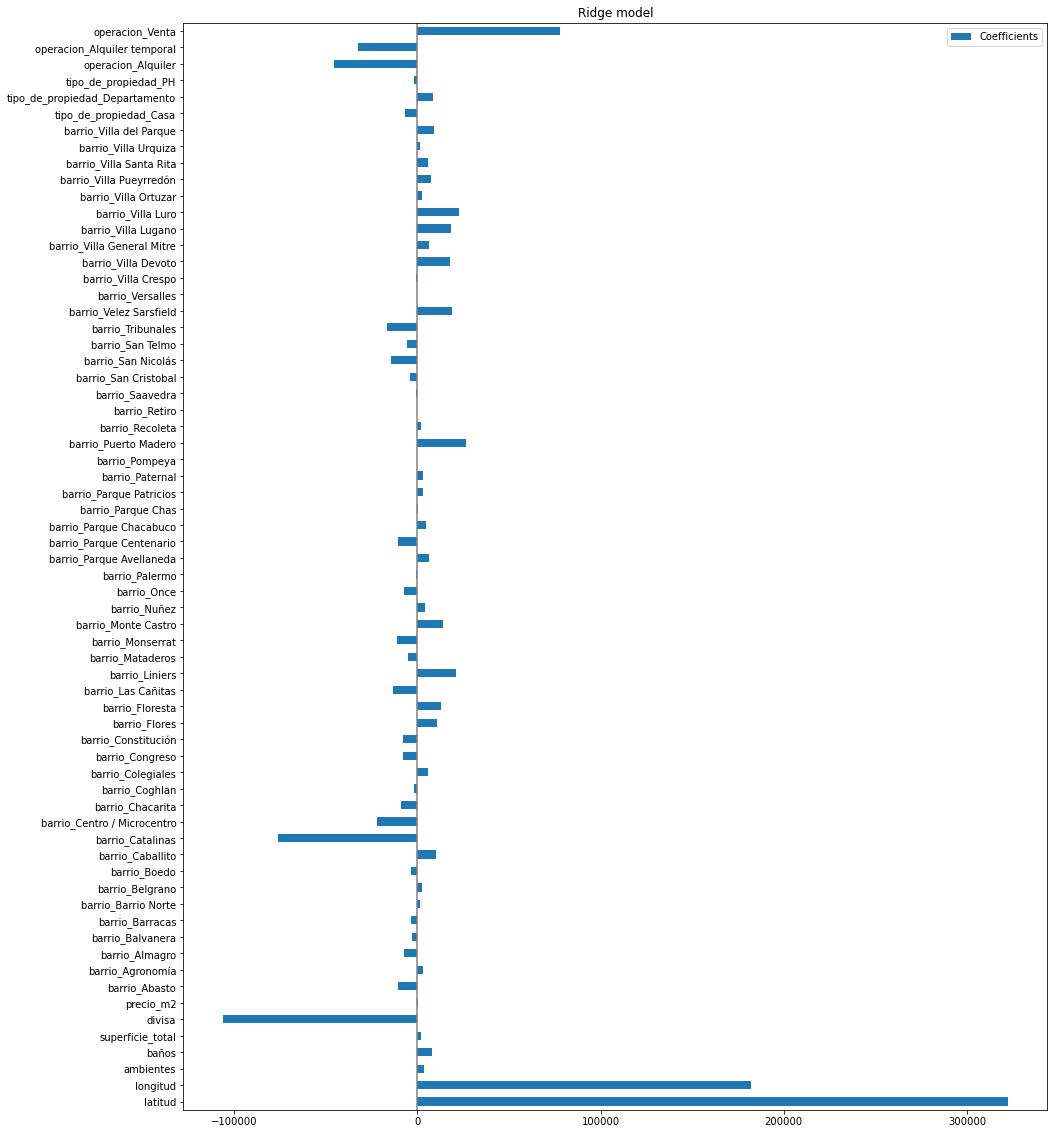

In [95]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(20, 20))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

En este grafico podemos observar que las caracteristicas de  longitud y  latitud, son las variables que más influyen en el modelo. Es decir que lo mas revlevante a la hora de tazar un inmueble es la ubicacion.

### Conclusión

Finalizando este tp aprendi muchas cosas. Primero que todo observo y me doy cuenta de la utilidad del Machine Learning, el uso de este  modelo de aprendizaje automático podría permitir hacer predicciones precisas y rápidas del valor de los departamentos. Esto podría mejorar la eficiencia y la precisión de la evaluación en comparación con la evaluación manual realizada por los agentes inmobiliarios. Además, el modelo podría aprender a partir de datos históricos y mejorar su precisión con el tiempo.
Tambien se observa la diferentes importancias de las variables de un departamento.
La predicción del valor de los precios de los departamentos podría tener un impacto positivo en el beneficio de la industria inmobiliaria ya que podría ayudar a determinar de manera más precisa el costo de las propiedad. Siendo yo, asesor inmobiliario esto me podría permitir ser  más eficiente a la hora de la tazacion de un inmueble, lo que podría aumentar mi beneficio en el largo plazo. Hoy muchas inmobiliarias pierden mucho tiempo y clientes por el error de la tazacion de un inmueble, porque el hecho de equivocarse en la misma,provocaria dos situaciones posibles. 
1:en el caso que la tazacion seria por sobre lo que verdaderamente es el valor de la propiedad, generaria un bajo interes en la gente y por ende nadie lo iria a ver,y pasa el tiempo y el dueño no vende su inmueble, o tambien el dueño pensaria que la inmobiliaria no es buena y no tiene clientes para su mercaderia.
2: en el caso que la tazacion seria por debajo de lo que verdaderamente es el valor de la propiedad,generaria una perdida de plata en el dueño de la misma,ya que la podriahaber vendido a un precio mas elevado.
